# 1 选择区域（西安建筑高度数据）

In [50]:
import plotly.express as px
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [52]:
poi=gpd.read_file('shp/西安.shp',crs='EPSG:32749')    #读取shp格式文件

<AxesSubplot:>

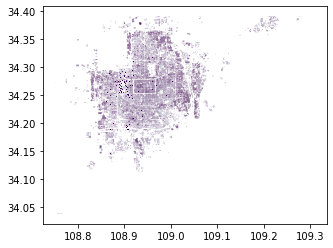

In [53]:
poi.plot(column='Floor')   #可以看出为区块图，之后需要转化为点图

# 2 数据及预处理

In [54]:
#查看数据结构
poi

,Id,Floor,geometry
0,0,4,"POLYGON ((108.75168 34.27170, 108.75191 34.271..."
1,0,6,"POLYGON ((108.75501 34.03893, 108.75607 34.038..."
2,0,6,"POLYGON ((108.75498 34.03852, 108.75547 34.038..."
3,0,8,"POLYGON ((108.75540 34.03874, 108.75548 34.038..."
4,0,2,"POLYGON ((108.75640 34.03894, 108.75657 34.038..."
...,...,...,...
145042,0,2,"POLYGON ((109.28140 34.39011, 109.28148 34.390..."
145043,0,3,"POLYGON ((109.30703 34.15702, 109.30751 34.157..."
145044,0,6,"POLYGON ((109.30702 34.15702, 109.30703 34.156..."
145045,0,6,"POLYGON ((109.30772 34.15705, 109.30773 34.156..."


In [55]:
#查看数据缺失值情况
poi.isna().sum()

Id            0
Floor         0
geometry    566
dtype: int64

In [56]:
#数据处理 ，删除缺失值
poi.dropna(axis=0,inplace=True)
poi.reset_index(drop=True, inplace=True)
poi.isna().sum()

Id          0
Floor       0
geometry    0
dtype: int64

In [57]:
poi

,Id,Floor,geometry
0,0,4,"POLYGON ((108.75168 34.27170, 108.75191 34.271..."
1,0,6,"POLYGON ((108.75501 34.03893, 108.75607 34.038..."
2,0,6,"POLYGON ((108.75498 34.03852, 108.75547 34.038..."
3,0,8,"POLYGON ((108.75540 34.03874, 108.75548 34.038..."
4,0,2,"POLYGON ((108.75640 34.03894, 108.75657 34.038..."
...,...,...,...
144476,0,2,"POLYGON ((109.28140 34.39011, 109.28148 34.390..."
144477,0,3,"POLYGON ((109.30703 34.15702, 109.30751 34.157..."
144478,0,6,"POLYGON ((109.30702 34.15702, 109.30703 34.156..."
144479,0,6,"POLYGON ((109.30772 34.15705, 109.30773 34.156..."


<AxesSubplot:>

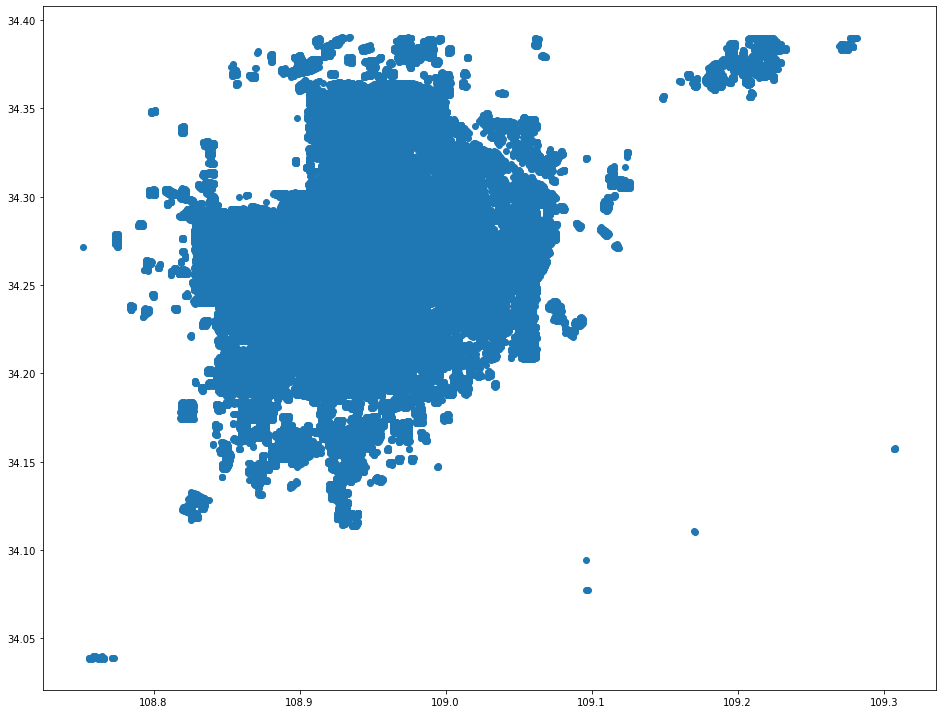

In [7]:
# 新增一列，每个建筑的中心点
poi['centroid'] = poi.centroid
# 将新增列设置为几何列
poi = poi.set_geometry('centroid') 
poi.plot(figsize=(16,16))

In [23]:
# 新增经纬度列
poi['lng']=poi['centroid'].apply(lambda x:x.coords.xy[0][0])
poi['lat']=poi['centroid'].apply(lambda x:x.coords.xy[1][0])

In [24]:
poi

,Id,Floor,geometry,centroid,lng,lat
0,0,4,"POLYGON ((108.75168 34.27170, 108.75191 34.271...",POINT (108.75187 34.27160),108.751873,34.271604
1,0,6,"POLYGON ((108.75501 34.03893, 108.75607 34.038...",POINT (108.75553 34.03886),108.755533,34.038859
2,0,6,"POLYGON ((108.75498 34.03852, 108.75547 34.038...",POINT (108.75550 34.03845),108.755499,34.038451
3,0,8,"POLYGON ((108.75540 34.03874, 108.75548 34.038...",POINT (108.75551 34.03864),108.755512,34.038645
4,0,2,"POLYGON ((108.75640 34.03894, 108.75657 34.038...",POINT (108.75646 34.03865),108.756459,34.038649
...,...,...,...,...,...,...
144476,0,2,"POLYGON ((109.28140 34.39011, 109.28148 34.390...",POINT (109.28144 34.38996),109.281438,34.389963
144477,0,3,"POLYGON ((109.30703 34.15702, 109.30751 34.157...",POINT (109.30727 34.15696),109.307273,34.156962
144478,0,6,"POLYGON ((109.30702 34.15702, 109.30703 34.156...",POINT (109.30697 34.15695),109.306973,34.156949
144479,0,6,"POLYGON ((109.30772 34.15705, 109.30773 34.156...",POINT (109.30762 34.15698),109.307621,34.156979


## 3.1 核密度图

In [31]:
from scipy import stats
xy = poi[['lng','lat']].to_numpy().T
poi_coordi_kernel=stats.gaussian_kde(xy)
z = poi_coordi_kernel.evaluate(xy)

In [48]:
poi

,Id,Floor,geometry,centroid,lng,lat,kde
0,0,4,"POLYGON ((108.75168 34.27170, 108.75191 34.271...",POINT (108.75187 34.27160),108.751873,34.271604,0.067715
1,0,6,"POLYGON ((108.75501 34.03893, 108.75607 34.038...",POINT (108.75553 34.03886),108.755533,34.038859,0.319884
2,0,6,"POLYGON ((108.75498 34.03852, 108.75547 34.038...",POINT (108.75550 34.03845),108.755499,34.038451,0.321366
3,0,8,"POLYGON ((108.75540 34.03874, 108.75548 34.038...",POINT (108.75551 34.03864),108.755512,34.038645,0.320744
4,0,2,"POLYGON ((108.75640 34.03894, 108.75657 34.038...",POINT (108.75646 34.03865),108.756459,34.038649,0.336671
...,...,...,...,...,...,...,...
144476,0,2,"POLYGON ((109.28140 34.39011, 109.28148 34.390...",POINT (109.28144 34.38996),109.281438,34.389963,1.309377
144477,0,3,"POLYGON ((109.30703 34.15702, 109.30751 34.157...",POINT (109.30727 34.15696),109.307273,34.156962,0.068109
144478,0,6,"POLYGON ((109.30702 34.15702, 109.30703 34.156...",POINT (109.30697 34.15695),109.306973,34.156949,0.068052
144479,0,6,"POLYGON ((109.30772 34.15705, 109.30773 34.156...",POINT (109.30762 34.15698),109.307621,34.156979,0.068084


<AxesSubplot:>

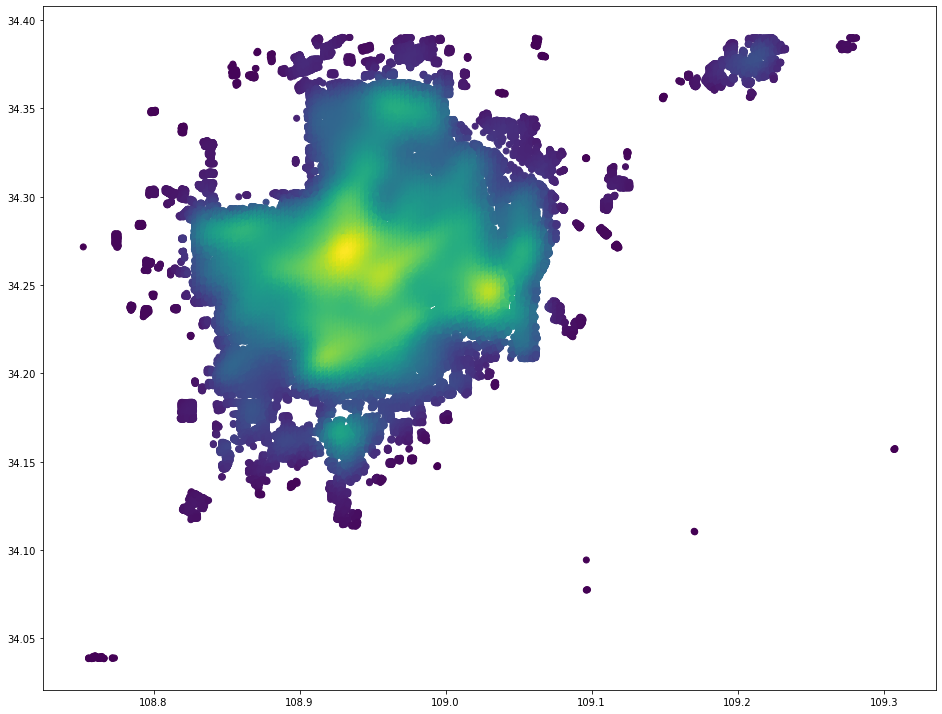

In [34]:
poi['kde'] = z
poi.plot(column='kde',figsize=(16,16))

## 3.2 K-means进行聚类

In [35]:
from sklearn.cluster import KMeans

In [36]:
km = KMeans(n_clusters=7)
km.fit(poi[['Floor']])
label= km.labels_
poi['label']=label

array([6, 2, 2, ..., 2, 2, 0])

In [43]:
poi

,Id,Floor,geometry,centroid,lng,lat,kde,label
0,0,4,"POLYGON ((108.75168 34.27170, 108.75191 34.271...",POINT (108.75187 34.27160),108.751873,34.271604,0.067715,6
1,0,6,"POLYGON ((108.75501 34.03893, 108.75607 34.038...",POINT (108.75553 34.03886),108.755533,34.038859,0.319884,2
2,0,6,"POLYGON ((108.75498 34.03852, 108.75547 34.038...",POINT (108.75550 34.03845),108.755499,34.038451,0.321366,2
3,0,8,"POLYGON ((108.75540 34.03874, 108.75548 34.038...",POINT (108.75551 34.03864),108.755512,34.038645,0.320744,2
4,0,2,"POLYGON ((108.75640 34.03894, 108.75657 34.038...",POINT (108.75646 34.03865),108.756459,34.038649,0.336671,0
...,...,...,...,...,...,...,...,...
144476,0,2,"POLYGON ((109.28140 34.39011, 109.28148 34.390...",POINT (109.28144 34.38996),109.281438,34.389963,1.309377,0
144477,0,3,"POLYGON ((109.30703 34.15702, 109.30751 34.157...",POINT (109.30727 34.15696),109.307273,34.156962,0.068109,6
144478,0,6,"POLYGON ((109.30702 34.15702, 109.30703 34.156...",POINT (109.30697 34.15695),109.306973,34.156949,0.068052,2
144479,0,6,"POLYGON ((109.30772 34.15705, 109.30773 34.156...",POINT (109.30762 34.15698),109.307621,34.156979,0.068084,2


<AxesSubplot:>

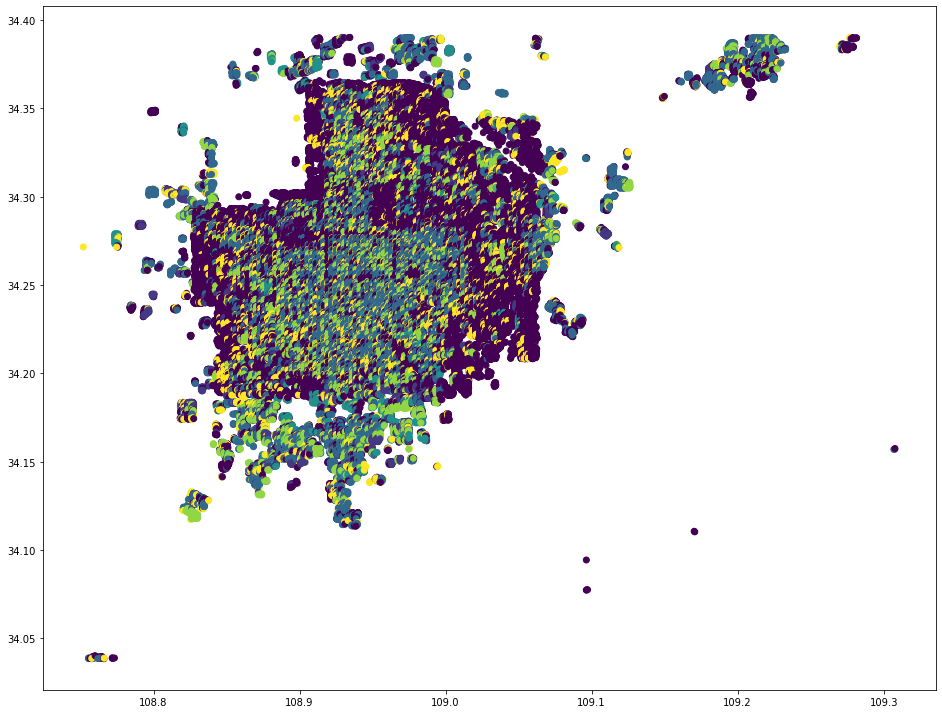

In [38]:

poi.plot(column='label',figsize=(16,16))